In [2]:
import math, json, collections, itertools
import os
import pandas as pd
import sys

#Network analysis
import networkx as nx

#Visual
import matplotlib.pyplot as plt

# Specify the path to the project root directory
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
sys.path.append(project_root)

# Import custom modulessrc
import src.utils as utils

### Steps:
1. Read data.
2. Basic EDA.
3. Prepare data.\
3.1. Create matrix.\
3.2. Count matches between directors.
4. Create graph.
5. Answer network related questions.

## 1. Read data

In [32]:
os.listdir('../data')

['US_Directors_favourite_movies.csv', 'US_Directors_favourite_movies.xls']

In [33]:
df_us_directors = pd.read_excel('../data/US_Directors_favourite_movies.xls')
df_us_directors

,Director,Movie,Year,Movie's director
0,Woody Allen,"400 Blows, The",1959,François Truffaut
1,Woody Allen,8½,1963,Federico Fellini
2,Woody Allen,Amarcord,1972,Federico Fellini
3,Woody Allen,"Bicycle Thieves, The",1948,Vittorio de Sica
4,Woody Allen,Citizen Kane,1941,Orson Welles
...,...,...,...,...
471,Steven Soderbergh,"The 5,000 Fingers of Dr. T",1953,Roy Rowland
472,Steven Soderbergh,The Conversation,1974,Francis Ford Coppola
473,Steven Soderbergh,Citizen Kane,1941,Orson Welles
474,Steven Soderbergh,Annie Hall,1977,Woody Allen


### 2. Basic EDA

In [34]:
df_us_directors['Director'].nunique()

47

<Axes: >

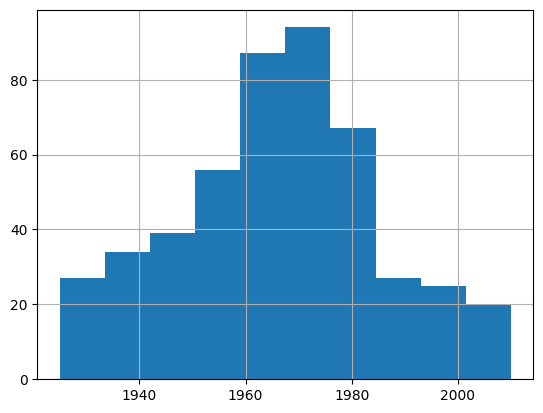

In [35]:
df_us_directors['Year'].hist()

In [36]:
df_us_directors['Movie'].nunique()

351

In [37]:
median_year = int(df_us_directors['Year'].median())
print(f"Median Year: {median_year}, distance from median year to year of poll: {2012 - median_year}")

Median Year: 1967, distance from median year to year of poll: 45


In [38]:
df_us_directors['Movie'].value_counts()[:10]

Movie
Citizen Kane               8
Vertigo                    7
Jaws                       6
2001: A Space Odyssey      6
8½                         6
Lawrence of Arabia         6
Godfather: Part II, The    4
400 Blows, The             4
Tokyo Story                4
Barry Lyndon               4
Name: count, dtype: int64

5 out of 10 - overlaps with global top-10 for 2012

## 3. Prepare data

## 3.1. Create matrix

In [39]:
Directors_US=[]
for i in range(len(df_us_directors)):
    if df_us_directors.iloc[i,0] not in Directors_US:
        Directors_US.append(df_us_directors.iloc[i,0])
Directors_US=[d[:-1] if d[-1]==' ' else d for d in Directors_US ]
Directors_US

['Woody Allen',
 'Thom Andersen',
 'Gregg Araki',
 'Henry Bean',
 'Charles Burnett',
 'Antonio Campos',
 'Joseph Cedar',
 'Francis Ford Coppola',
 'Sara Driver',
 'Jay Duplass',
 'Sean Durkin',
 'Abel Ferrara',
 'Morgan Fisher',
 'Robert Gardner',
 'John Gianvito',
 'Monte Hellman',
 'William E Jones',
 'Miranda July',
 'Lawrence Kasdan',
 'Aaron Katz',
 'Lloyd Kaufman',
 'Lodge Kerrigan',
 'Richard Lester',
 'Michael Mann',
 'John McNaughton',
 'Sam Mendes',
 'Greg Mottola',
 'Jeff Nichols',
 'Amos Poe',
 'Mark Romanek',
 'David O. Russell',
 'Ira Sachs',
 'Benjamin Safdie',
 'Josh Safdie',
 'Paul Schrader',
 'Martin Scorsese',
 'Allan Sekula',
 'Whit Stillman',
 'Joe Swanberg',
 'Quentin Tarantino',
 'Marc Webb',
 'Billy Woodberry',
 'Steven Spielberg',
 'Christopher Nolan',
 'David Fincher',
 'Paul Thomas Anderson',
 'Steven Soderbergh']

In [40]:
Directors_choice_US=utils.Director_full_choice(df_us_directors)
Directors_choice_US

{'Woody Allen': [('400 Blows, The', 1959, 'François Truffaut'),
  ('8½', 1963, 'Federico Fellini'),
  ('Amarcord', 1972, 'Federico Fellini'),
  ('Bicycle Thieves, The', 1948, 'Vittorio de Sica'),
  ('Citizen Kane', 1941, 'Orson Welles'),
  ('Discreet Charm of the Bourgeoisie, The', 1972, 'Luis Buñuel'),
  ('grande illusion, La', 1937, 'Jean Renoir'),
  ('Paths of Glory', 1957, 'Stanley Kubrick'),
  ('Rashomon', 1950, 'Akira Kurosawa'),
  ('Seventh Seal, The', 1957, 'Ingmar Bergman')],
 'Thom Andersen': [("God's Step Children", 1938, 'Oscar Micheaux'),
  ('High and Low', 1963, 'Akira Kurosawa'),
  ('Hour of the Furnaces, The', 1968, 'Octavio Getino/Fernando E. Solanas'),
  ('Kiss Me Deadly', 1955, 'Robert Aldrich'),
  ('My Darling Clementine', 1946, 'John Ford'),
  ('Not Reconciled', 1965, 'Jean-Marie Straub/Danièle Huillet'),
  ('Perceval', 1978, 'Eric Rohmer'),
  ('Pickpocket', 1959, 'Robert Bresson'),
  ('Puppetmaster, The', 1993, 'Hsiao-hsien Hou'),
  ('Tokyo Story', 1953, 'Ozu Yasu

## 3.2. Count matches between directors

In [41]:
matr=utils.matrix_init(Directors_US)
matr

,Woody Allen,Thom Andersen,Gregg Araki,Henry Bean,Charles Burnett,Antonio Campos,Joseph Cedar,Francis Ford Coppola,Sara Driver,Jay Duplass,...,Whit Stillman,Joe Swanberg,Quentin Tarantino,Marc Webb,Billy Woodberry,Steven Spielberg,Christopher Nolan,David Fincher,Paul Thomas Anderson,Steven Soderbergh
Woody Allen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thom Andersen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gregg Araki,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Henry Bean,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Charles Burnett,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Antonio Campos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Joseph Cedar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Francis Ford Coppola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sara Driver,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jay Duplass,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
all_directors = list(matr.index)

In [43]:
def count_common(poll: dict, name1: str, name2: str) -> int:
    """Count the number of common movies between two directors.

    Args:
        poll (dict): Mapping of directors to their 10 selected movies.
        name1 (str): First director's name.
        name2 (str): Second director's name.

    Returns:
        int: Number of common movies between the two directors.
    """
    list1=[line[0] for line in poll[name1]] 
    list2=[line[0] for line in poll[name2]] 
    count=len(set(list1).intersection(list2))
    return count

In [44]:
for i in range(len(all_directors)):
    for j in range(i+1,len(all_directors)):
        matr.loc[all_directors[i]][all_directors[j]]=matr.loc[all_directors[j]][all_directors[i]]=count_common(Directors_choice_US,all_directors[i],all_directors[j])

C:\Users\yurii\AppData\Local\Temp\ipykernel_20336\3128183683.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  matr.loc[all_directors[i]][all_directors[j]]=matr.loc[all_directors[j]][all_directors[i]]=count_common(Directors_choice_US,all_d

In [45]:
matr

,Woody Allen,Thom Andersen,Gregg Araki,Henry Bean,Charles Burnett,Antonio Campos,Joseph Cedar,Francis Ford Coppola,Sara Driver,Jay Duplass,...,Whit Stillman,Joe Swanberg,Quentin Tarantino,Marc Webb,Billy Woodberry,Steven Spielberg,Christopher Nolan,David Fincher,Paul Thomas Anderson,Steven Soderbergh
Woody Allen,0,0,0,1,1,1,1,0,0,0,...,0,0,0,1,1,0,0,1,0,1
Thom Andersen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gregg Araki,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Henry Bean,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
Charles Burnett,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Antonio Campos,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Joseph Cedar,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
Francis Ford Coppola,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
Sara Driver,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jay Duplass,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4. Create graph

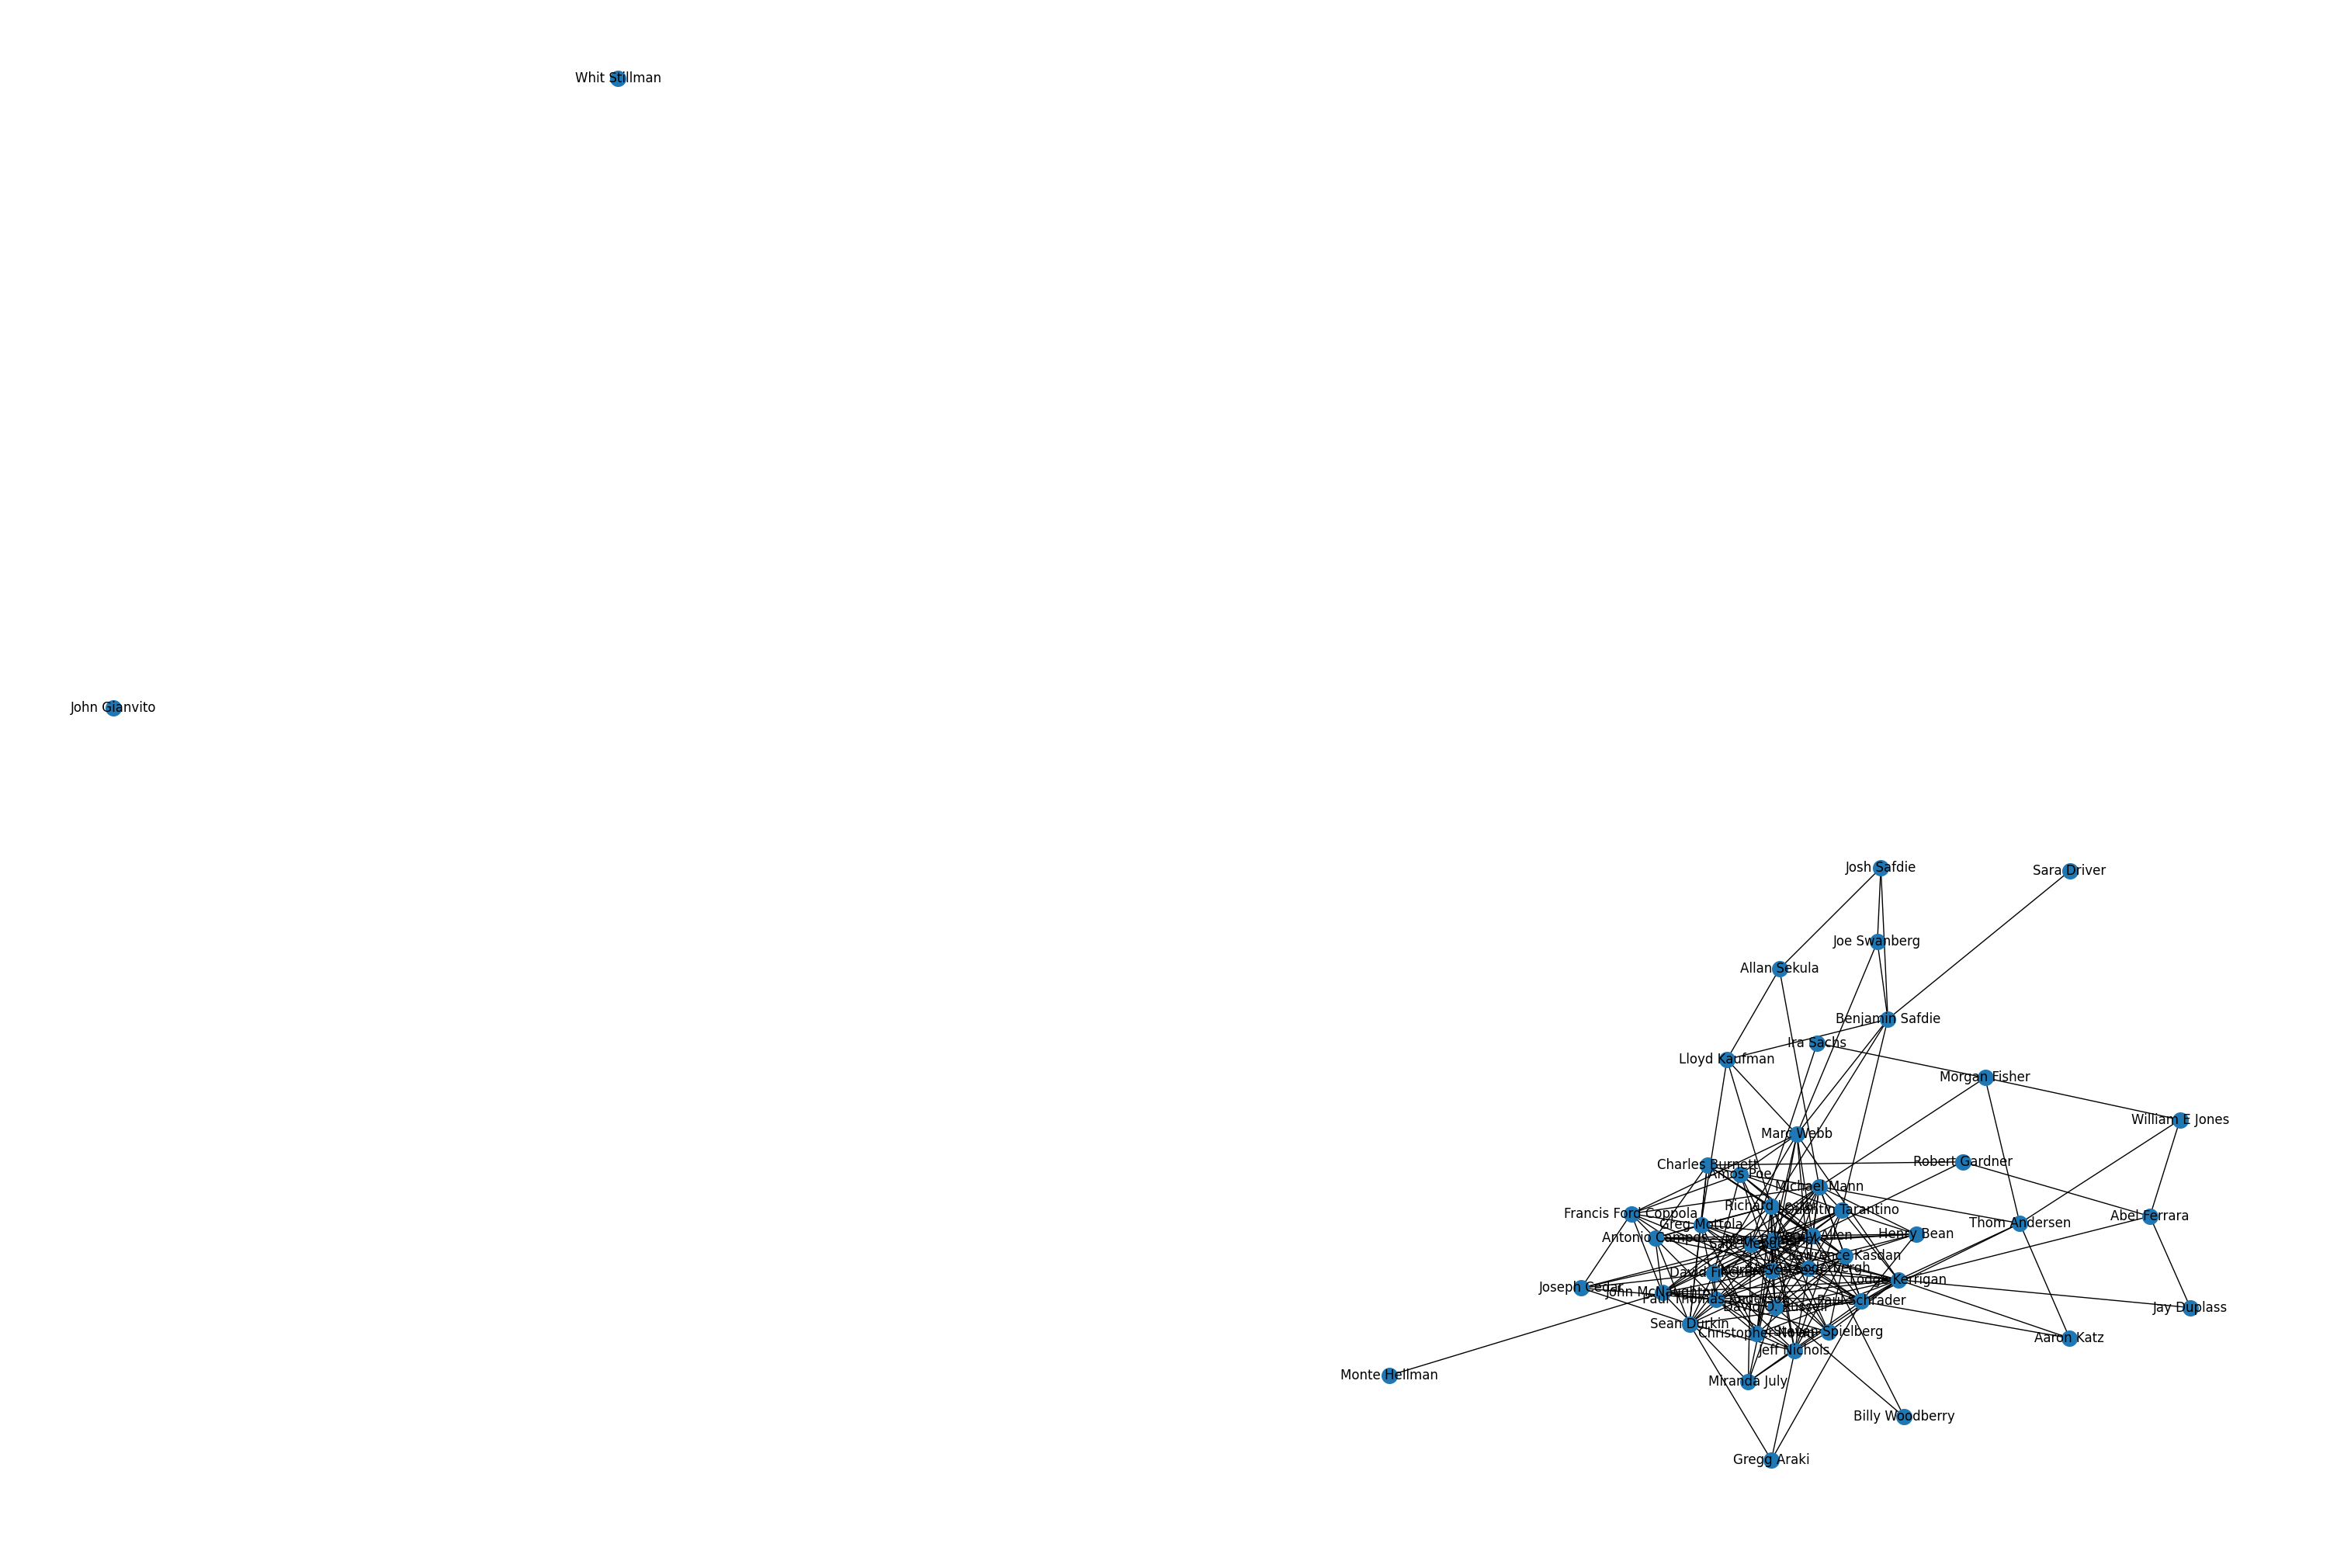

In [46]:
G1 = nx.Graph(matr)

plt.figure(figsize=(30, 20)) 
nx.draw(G1,node_size=200,with_labels=True)
plt.show()

### 5. Answer network related questions

In [47]:
degree_centr = nx.degree_centrality(G1)
between_centr = nx.betweenness_centrality(G1)
clustering = nx.clustering(G1)
print('Degree centrality : ',degree_centr)
print('Betweenness centrality : ',between_centr)
print('Clustering: ', clustering)

Degree centrality :  {'Woody Allen': 0.3695652173913043, 'Thom Andersen': 0.13043478260869565, 'Gregg Araki': 0.06521739130434782, 'Henry Bean': 0.17391304347826086, 'Charles Burnett': 0.17391304347826086, 'Antonio Campos': 0.19565217391304346, 'Joseph Cedar': 0.13043478260869565, 'Francis Ford Coppola': 0.19565217391304346, 'Sara Driver': 0.021739130434782608, 'Jay Duplass': 0.043478260869565216, 'Sean Durkin': 0.2608695652173913, 'Abel Ferrara': 0.08695652173913043, 'Morgan Fisher': 0.08695652173913043, 'Robert Gardner': 0.06521739130434782, 'John Gianvito': 0.0, 'Monte Hellman': 0.021739130434782608, 'William E Jones': 0.06521739130434782, 'Miranda July': 0.13043478260869565, 'Lawrence Kasdan': 0.2391304347826087, 'Aaron Katz': 0.06521739130434782, 'Lloyd Kaufman': 0.10869565217391304, 'Lodge Kerrigan': 0.3695652173913043, 'Richard Lester': 0.32608695652173914, 'Michael Mann': 0.3695652173913043, 'John McNaughton': 0.2826086956521739, 'Sam Mendes': 0.3913043478260869, 'Greg Mottola'

In [48]:
{k: v for k, v in sorted(between_centr.items(), key=lambda item: item[1], reverse=True)}
#Lodge Kerrigan - touchstone of american cinema

{'Lodge Kerrigan': 0.12874543926071053,
 'Michael Mann': 0.10332544277845698,
 'Benjamin Safdie': 0.07140188045985148,
 'Woody Allen': 0.069087953108041,
 'Marc Webb': 0.06775363299581452,
 'Sam Mendes': 0.06469989826804379,
 'Richard Lester': 0.06131237995704743,
 'Paul Schrader': 0.05965959905378122,
 'John McNaughton': 0.05173636504558763,
 'Quentin Tarantino': 0.04294599237275269,
 'Martin Scorsese': 0.03809304748239886,
 'David O. Russell': 0.030206724364420557,
 'Mark Romanek': 0.029197649427089672,
 'Thom Andersen': 0.028185886372160893,
 'Greg Mottola': 0.026708206804825167,
 'Steven Soderbergh': 0.026523096048337323,
 'Paul Thomas Anderson': 0.02400001263523297,
 'Sean Durkin': 0.020169103772270863,
 'Allan Sekula': 0.015621825839217144,
 'Abel Ferrara': 0.015471779136527645,
 'Jeff Nichols': 0.012241431537831726,
 'Charles Burnett': 0.0122059387175485,
 'Morgan Fisher': 0.011813680107584624,
 'Lawrence Kasdan': 0.010663826901418632,
 'David Fincher': 0.010636086370799658,
 'L

In [49]:
{k: v for k, v in sorted(degree_centr.items(), key=lambda item: item[1], reverse=True)}


{'Martin Scorsese': 0.43478260869565216,
 'Sam Mendes': 0.3913043478260869,
 'Mark Romanek': 0.3913043478260869,
 'Steven Soderbergh': 0.3913043478260869,
 'Woody Allen': 0.3695652173913043,
 'Lodge Kerrigan': 0.3695652173913043,
 'Michael Mann': 0.3695652173913043,
 'Paul Schrader': 0.34782608695652173,
 'Richard Lester': 0.32608695652173914,
 'Paul Thomas Anderson': 0.32608695652173914,
 'David O. Russell': 0.30434782608695654,
 'John McNaughton': 0.2826086956521739,
 'Greg Mottola': 0.2826086956521739,
 'Sean Durkin': 0.2608695652173913,
 'Quentin Tarantino': 0.2608695652173913,
 'David Fincher': 0.2608695652173913,
 'Lawrence Kasdan': 0.2391304347826087,
 'Jeff Nichols': 0.2391304347826087,
 'Marc Webb': 0.2391304347826087,
 'Amos Poe': 0.21739130434782608,
 'Christopher Nolan': 0.21739130434782608,
 'Antonio Campos': 0.19565217391304346,
 'Francis Ford Coppola': 0.19565217391304346,
 'Steven Spielberg': 0.19565217391304346,
 'Henry Bean': 0.17391304347826086,
 'Charles Burnett': 0

In [50]:
most_connected = [k for k, v in sorted(degree_centr.items(), key=lambda item: item[1], reverse=True)][0]
most_connected

'Martin Scorsese'

In [51]:
community_connector = [k for k, v in sorted(between_centr.items(), key=lambda item: item[1], reverse=True)][0]
community_connector

'Lodge Kerrigan'

In [52]:
disconnected =[k for k, v in degree_centr.items() if v < .000001]
disconnected

['John Gianvito', 'Whit Stillman']

### Updated graph

In [53]:
matr_2 = matr.drop(columns=disconnected, index=disconnected)
matr_2.shape

(45, 45)

Colour-coding:
- green: most connected director;
- red: community connector.

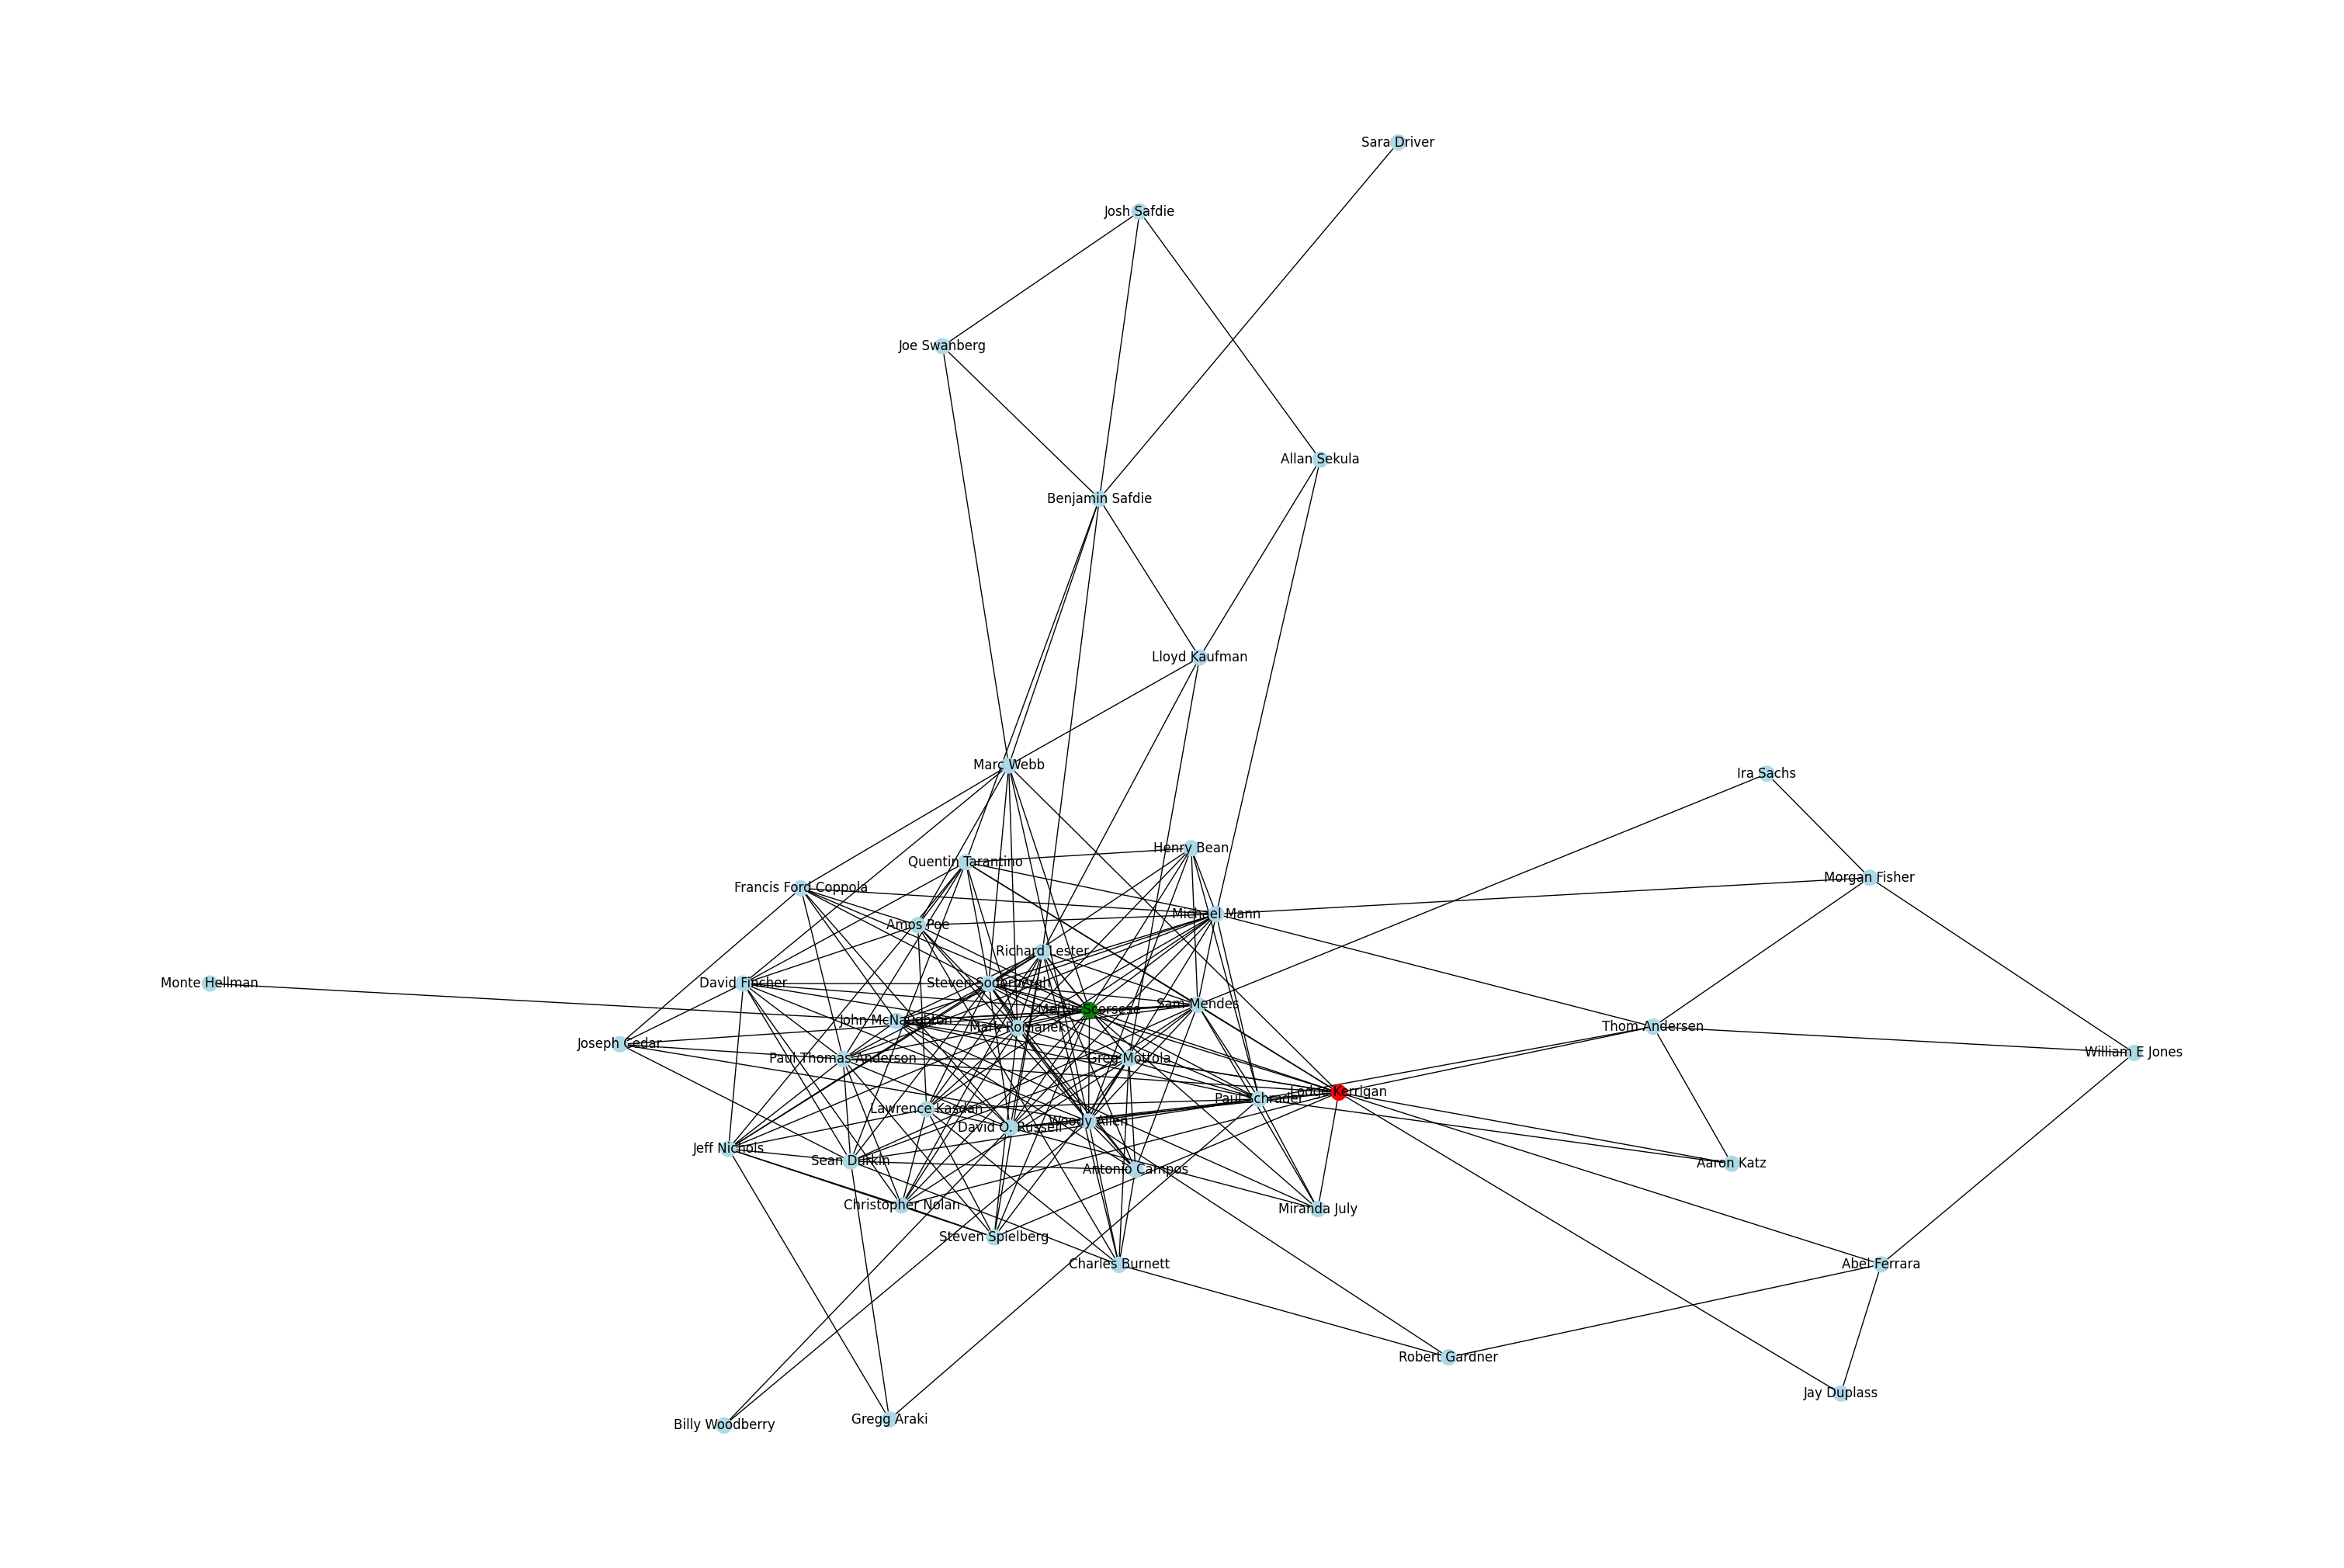

In [54]:
G2 = nx.Graph(matr_2)

centre_node = most_connected
connector_node = community_connector

node_colors = ['green' if node == centre_node 
               else 'red' if node == connector_node
               else 'lightblue' for node in G2.nodes()]  

plt.figure(figsize=(30, 20))
nx.draw(G2, node_size=200, with_labels=True, node_color=node_colors)
if not os.path.exists("../images"):
    os.makedirs("../images")
plt.savefig('../images/US_directors_network.png', dpi=300, bbox_inches='tight')

In [55]:
Directors_choice_US[most_connected]

[('2001: A Space Odyssey', 1968, 'Stanley Kubrick'),
 ('8½', 1963, 'Federico Fellini'),
 ('Ashes and Diamonds', 1958, 'Andrzej Wajda'),
 ('Citizen Kane', 1941, 'Orson Welles'),
 ('Leopard, The', 1963, 'Luchino Visconti'),
 ('Paisà', 1946, 'Roberto Rossellini'),
 ('Red Shoes, The', 1948, 'Michael Powell/Emeric Pressburger'),
 ('River, The', 1951, 'Jean Renoir'),
 ('Salvatore Giuliano', 1962, 'Francesco Rosi'),
 ('Searchers, The', 1956, 'John Ford'),
 ('Ugetsu Monogatari', 1953, 'Mizoguchi Kenji'),
 ('Vertigo', 1958, 'Alfred Hitchcock')]

In [56]:
Directors_choice_US[community_connector]

[('2001: A Space Odyssey', 1968, 'Stanley Kubrick'),
 ('Aguirre, Wrath of God', 1972, 'Werner Herzog'),
 ('Alice in the Cities', 1974, 'Wim Wenders'),
 ('Annie Hall', 1977, 'Woody Allen'),
 ('Fear Eats the Soul', 1974, 'Rainer Werner Fassbinder'),
 ('Pickpocket', 1959, 'Robert Bresson'),
 ('Taxi Driver', 1976, 'Martin Scorsese'),
 ('Tokyo Story', 1953, 'Ozu Yasujirô'),
 ('Vertigo', 1958, 'Alfred Hitchcock'),
 ('Woman Under the Influence, A', 1974, 'John Cassavetes')]

Explanation:
3 out of 10 movies in his list are in top-5, but it's the rest of the movies that makes him well-connected
with the fellow directors. 

In [57]:
Directors_choice_US[disconnected[0]]

[('Age of the Earth, The', 1980, 'Glauber Rocha'),
 ('commune (Paris, 1871), La', 2000, 'Peter Watkins'),
 ('Earth', 1930, 'Aleksandr Dovzhenko'),
 ('Evolution of a Filipino Family', 2004, 'Lav Díaz'),
 ('House is Black, The', 1962, 'Forough Farrokhzad'),
 ('Kuhle Wampe', 1932, 'Bertold Brecht/Ernst Ottwald'),
 ('Arguments and a Story or Reason, Debate and a Tale', 1974, 'Ritwik Ghatak'),
 ('Shiranui Sea', 1975, 'Tsuchimoto Noriaki'),
 ('Story of Kindness', 1985, 'Tran Van Thuy'),
 ('West Indies, ou les nègres marrons de la liberté', 1979, 'Med Hondo')]

In [58]:
Directors_choice_US[disconnected[1]]

[('Awful Truth, The', 1937, 'Leo McCarey'),
 ('Big Deal on Madonna Street', 1958, 'Mario Monicelli'),
 ('Gay Divorce, The', 1934, 'Mark Sandrich'),
 ('Howards End', 1992, 'James Ivory'),
 ("Miracle of Morgan's Creek", 1943, 'Preston Sturges'),
 ('Shop Around the Corner, The', 1940, 'Ernst Lubitsch'),
 ('Stolen Kisses', 1968, 'François Truffaut'),
 ('Stranger than Paradise', 1982, 'Jim Jarmusch'),
 ('Strangers on a Train', 1951, 'Alfred Hitchcock'),
 ('Wagon Master', 1950, 'John Ford')]

Basic usage of Greatest movies list: \
Watch from top-10 (most of us already did).
Watch movies that moved to top-10 in comparison with the previous poll.

Recommendation options based on network analysis:
1 - Explore movies (7 out of 10) of LK that make him well-connected with others.
2 - Explore movies of most fellow-connected inspirationally (LK).
3 - Explore movies of 2 most disconnected directors as they unique movies in the list.
4 - Watch movies of 2 most disconnected directors to explore new.

I did (2) and was >>> that this **road movie** explore topics of **recurrent trauma** and **personal choice**
which interestingly (in my opinion) summarizes key meta-topics of American cinema.